# Modelos de Classificação : SVC

### Importando libs  e funções

Importando libs

In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

# Importando libs de visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Importando funções

In [2]:
# Função que calcula os reais positivos
def rp(tp, fn):
    return tp + fn

# Função que calcula os reais negativos     
def rn(fp, tn):
    return fp + tn

# Função que calcula as predicoes positivas  
def pp(tp, fp):
    return tp + fp

# Função que calcula as predicoes negativas   
def pn(fn, tn):
    return fn + tn

# Função que calcula acurácia do modelo
def accuracy (tp, fp, fn, tn):
     accuracy = ((tp + tn) / (tp + tn + fp + fn))
     return (accuracy)
    
# Função que calcula a precisão 
def precision (tp, fp):
    precision =  (tp / (tp + fp)) #predições positivas
    return precision

# Função que calcula o recall
def recall(tp, fn):
    recall =  (tp / (tp + fn)) # reais positivos
    return recall

## Função que calcula o f-measure (media harmonica entre precision e recall)
def f_measure(tp, fp, fn):
    f_measure = (2 * precision(tp, fp) * recall(tp, fn)) / (recall(tp, fn) + precision(tp, fp))
    return f_measure
  
# Função que calcula o Informedness 
def informedness(tp, fp, fn, tn):
    inform = ((tp/rp(tp, fn)) - (fp/rn(fp, tn)))
    return inform

# Função que calcula o Markedness
def markdness(tp, fp, fn, tn):    
    mark = ((tp/pp(tp,fp)) - (fn/pn(fn,tn)))
    return mark

# Função de escalonamento
def feature_scaling(data):
    sc = StandardScaler()
    return sc.fit_transform(data)

# Função que gera o gráfico dos resultados de classificação
def plot_results_class(X, y, classifier, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Idade')
    plt.ylabel('Tarifa')
    plt.legend()
    plt.show()

### Etapa de exploração e tratamento dos dados

Importando os dados dos passageiros do titanic e selecionando uma amostragem dos dados para uma melhor visualização. O objetivo dessa tarefa de classificação é prever os passageiros sobreviventes com base nas suas informações pessoais.

Fonte: [Kaggle](https://www.kaggle.com/c/titanic/data)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/intelligentagents/aprendizagem-supervisionada/master/data/titanic.csv')
df = df.sample(n=100, random_state=0)

Descrevendo o dataset

In [4]:
# Exportando o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 495 to 681
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  100 non-null    int64  
 1   Survived     100 non-null    int64  
 2   Pclass       100 non-null    int64  
 3   Name         100 non-null    object 
 4   Sex          100 non-null    object 
 5   Age          79 non-null     float64
 6   SibSp        100 non-null    int64  
 7   Parch        100 non-null    int64  
 8   Ticket       100 non-null    object 
 9   Fare         100 non-null    float64
 10  Cabin        29 non-null     object 
 11  Embarked     100 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 10.2+ KB


In [5]:
# Visualizando o sumário das colunas numéricas do dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100.00000,100.00000,100.000000,79.000000,100.000000,100.000000,100.000000
mean,475.30000,0.43000,2.100000,27.948354,0.570000,0.430000,39.693957
std,256.15985,0.49757,0.881917,14.728176,1.046929,0.768772,51.751419
min,9.00000,0.00000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,270.00000,0.00000,1.000000,19.000000,0.000000,0.000000,8.626050
50%,501.50000,0.00000,2.000000,26.000000,0.000000,0.000000,25.039600
75%,688.75000,1.00000,3.000000,35.000000,1.000000,1.000000,37.462500
max,891.00000,1.00000,3.000000,63.000000,4.000000,4.000000,263.000000


Visualizando o dataset

In [6]:
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.00,4,1,382652,29.1250,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.00,0,2,2650,15.2458,NaN,C
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.00,0,0,PC 17582,153.4625,C125,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.00,0,2,36928,164.8667,C7,S
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.00,1,0,11967,91.0792,B49,C
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C


Preenchendo os valores númericos nulos (NA) da coluna "Age" com a mediana.


In [7]:
df = df.fillna(df.median())

df.head(5)

/var/folders/96/v98rl5mx1sxdlg9hmsyd9bfm0000gn/T/ipykernel_7010/495370049.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,0,3,"Yousseff, Mr. Gerious",male,26.0,0,0,2627,14.4583,NaN,C
648,649,0,3,"Willey, Mr. Edward",male,26.0,0,0,S.O./P.P. 751,7.5500,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,26.0,1,0,PC 17569,146.5208,B78,C
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C


Definindo as variáveis independentes e visualizando as 5 primeiras linhas:

In [8]:
X = df.iloc[:, [5, 9]].values
X[:5]


array([[ 26.    ,  14.4583],
       [ 26.    ,   7.55  ],
       [  7.    ,  29.125 ],
       [ 26.    , 146.5208],
       [ 29.    ,  15.2458]])

Definindo a variável dependente (Survived) e visualizando as 5 primeiras linhas:



In [9]:
y = df.iloc[:, 1].values
y[:5]


array([0, 0, 0, 1, 1])

 Criando os subconjuntos de treinamento e testes:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

print("Tamanho do Dataset. {}".format(df.shape[0]))
print("Tamanho do Conjunto de Treinamento. {}".format(len(X_train)))
print("Tamanho do Conjunto de Testes. {}".format(len(X_test)))

Tamanho do Dataset. 100
Tamanho do Conjunto de Treinamento. 80
Tamanho do Conjunto de Testes. 20


Normalizando as features e exibindo as 5 primeiras linhas:

In [11]:
X_train = feature_scaling(X_train)
X_test = feature_scaling(X_test)

X_train[:5]

array([[-0.2233842 ,  0.62589282],
       [ 0.50330481, -0.63776468],
       [ 0.35796701, -0.68999987],
       [-0.0780464 , -0.55753246],
       [-0.58672871, -0.2466326 ]])

### Etapa de Treinamento e Validação do Modelo

Importando e treinando o modelo com o conjunto de treinamento:

In [12]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

Prevendo os resultados do modelo criado com o conjunto de testes

In [13]:
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1])

Criando e exibindo os valores da matriz de confusão com o conjunto de testes 

In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

confusion_matrix(y_test, y_pred)

array([[10,  5],
       [ 1,  4]])

Visualizando a matriz de confusão

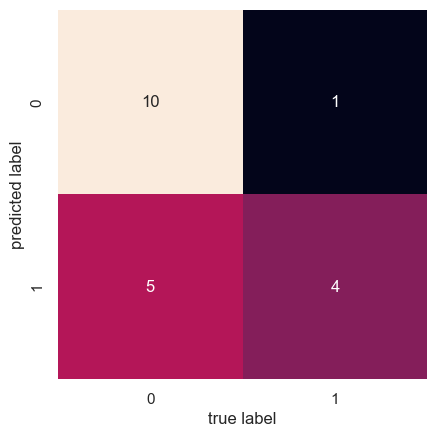

In [15]:
mat = confusion_matrix(y_test, y_pred)
mat
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Visualizando a métrica de **acurácia** utilizando as funções criadas e a bibilioteca sklearn:

In [16]:
accuracy(tp, fp, fn, tn)
classifier.score(X_test, y_test)

0.7

Exibindo a medida **f-measure**:

In [17]:
f_measure(tp, fp, fn)
f1_score(y_test, y_pred)  

0.5714285714285714

Exibindo os resultados do conjunto de treinamento:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


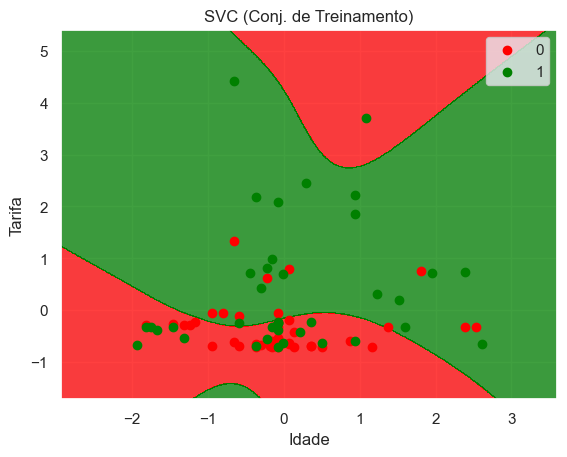

In [18]:
plot_results_class(X_train, y_train, classifier, 'SVC (Conj. de Treinamento)')

Exibindo os resultados do conjunto de testes:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


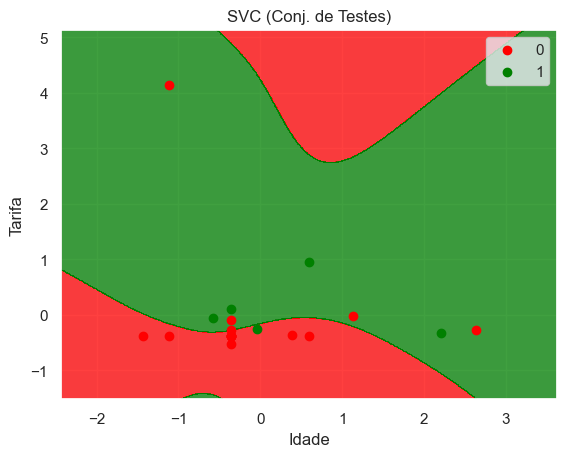

In [19]:
plot_results_class(X_test, y_test, classifier, 'SVC (Conj. de Testes)')